# Homework2 – Introduction to Artificial Neural Networks with Keras



# Building an Image Classifier

First let's import TensorFlow and Keras.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import os
import gzip
import numpy as np

current_dir = os.getcwd()   # First, get the path of the working directory 
path =current_dir+'\\Fashion_MNIST_Data'

# Second, import the Fashion MNIST data from the current directory+'\\Fashion_MNIST_Data' 
f = gzip.open(path+'\\train-labels-idx1-ubyte.gz','rb')  #Load the training label  
y_train_full=np.frombuffer(f.read(), dtype=np.uint8,offset=8) # due to header info, the data is designed to be read from offset 8 
f.close()

f = gzip.open(path+'\\train-images-idx3-ubyte.gz','rb')  #Load the training data
X_train_full=np.frombuffer(f.read(), dtype=np.uint8,offset=16) # due to header info, the data is designed to be read from offset 16 
f.close()
X_train_full=X_train_full.reshape(len(y_train_full), 784)
X_train_full1=X_train_full.reshape(len(y_train_full), 28,28)

f = gzip.open(path+'\\t10k-labels-idx1-ubyte.gz','rb')   #Load the test label
y_test=np.frombuffer(f.read(), dtype=np.uint8,offset=8)
f.close()

f = gzip.open(path+'\\t10k-images-idx3-ubyte.gz','rb')   #Load the test data
X_test=np.frombuffer(f.read(), dtype=np.uint8,offset=16).reshape(len(y_test), 784)

f.close()

In [3]:
# Check the consistency
print(len(X_train_full))
print(len(y_train_full))
print(len(X_test))
print(len(y_test))
y_test

60000
60000
10000
10000


array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

The training set contains 60,000 grayscale images, each 28×28 pixels. The class labels are:

**Label: Description**
*    0: 	TT-shirt/top
*    1: 	Trouser
*    2: 	Pullover
*    3: 	Dress
*    4: 	Coat
*    5: 	Sandal
*    6: 	Shirt
*    7: 	Sneaker
*    8: 	Bag
*    9: 	Ankle boot

In [4]:
#Check the shape of the dataset
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)

(60000, 784)
(60000,)
(10000, 784)


Each pixel intensity is represented as a byte (0 to 255):

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by `255.`.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Here are the corresponding class names:

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [8]:
class_names[y_train[0]]

'Coat'

Let's take a look at a sample of the images in the dataset:

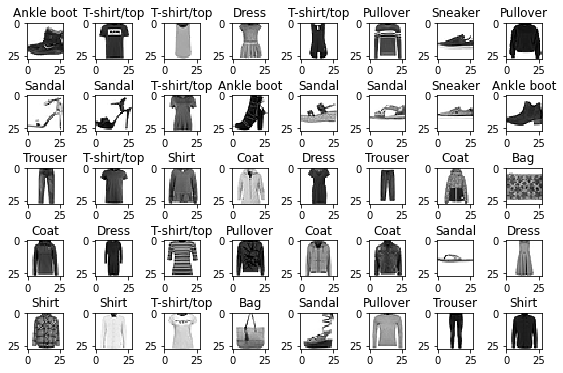

In [11]:
import matplotlib.pyplot as plt
n_rows = 5
n_cols = 8
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2)) # scale up, otherwsie, 28x28 image will look very small
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_full1[index], cmap="binary", interpolation="nearest")
        #plt.axis('off')
        plt.title(class_names[y_train_full[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=1.0)

plt.show()

**Figure 2:** Samples from Fashion MNIST in a 4 x 10 grid.

# Model 1

<img src="./images/WideDeep_ANN_2Input.png" width="300" border="1">

**Fig. 6**: Handling multiple inputs.

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
input_A = keras.layers.Input(shape=[400], name="wide_input")
input_B = keras.layers.Input(shape=[400], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(10, name="output",activation="softmax")(concat)
model1 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])


In [14]:
model1.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model1.h5", save_best_only=True)

In [15]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 400)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           12030       ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 400)]        0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

In [16]:
X_train_A, X_train_B = X_train[:, :400], X_train[:, 384:]
X_valid_A, X_valid_B= X_valid[:, :400], X_valid[:, 384:]
X_test_A, X_test_B = X_test[:, :400], X_test[:, 384:]




In [17]:
history1 = model1.fit((X_train_A, X_train_B), y_train, epochs=2000,
                    validation_data=((X_valid_A, X_valid_B), y_valid),callbacks=[checkpoint_cb])


Epoch 1/2000
1719/1719 [==============================] - 10s 4ms/step - loss: 0.9805 - sparse_categorical_accuracy: 0.6886 - val_loss: 0.6823 - val_sparse_categorical_accuracy: 0.7812
Epoch 2/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6224 - sparse_categorical_accuracy: 0.7938 - val_loss: 0.5602 - val_sparse_categorical_accuracy: 0.8114
Epoch 3/2000
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5461 - sparse_categorical_accuracy: 0.8130 - val_loss: 0.5409 - val_sparse_categorical_accuracy: 0.8104
Epoch 4/2000
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5111 - sparse_categorical_accuracy: 0.8222 - val_loss: 0.4898 - val_sparse_categorical_accuracy: 0.8336
Epoch 5/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4893 - sparse_categorical_accuracy: 0.8294 - val_loss: 0.4658 - val_sparse_categorical_accuracy: 0.8424
Epoch 6/2000
1719/1719 [==============================] - 5s 3ms/step - loss: 0

1719/1719 [==============================] - 9s 5ms/step - loss: 0.2816 - sparse_categorical_accuracy: 0.9011 - val_loss: 0.3504 - val_sparse_categorical_accuracy: 0.8776
Epoch 90/2000
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2803 - sparse_categorical_accuracy: 0.9013 - val_loss: 0.3583 - val_sparse_categorical_accuracy: 0.8768
Epoch 91/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2797 - sparse_categorical_accuracy: 0.9021 - val_loss: 0.3543 - val_sparse_categorical_accuracy: 0.8744
Epoch 92/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2788 - sparse_categorical_accuracy: 0.9009 - val_loss: 0.3535 - val_sparse_categorical_accuracy: 0.8776
Epoch 93/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2781 - sparse_categorical_accuracy: 0.9017 - val_loss: 0.3508 - val_sparse_categorical_accuracy: 0.8796
Epoch 94/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2777 - s

1719/1719 [==============================] - 8s 4ms/step - loss: 0.2042 - sparse_categorical_accuracy: 0.9276 - val_loss: 0.4135 - val_sparse_categorical_accuracy: 0.8730
Epoch 283/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2041 - sparse_categorical_accuracy: 0.9274 - val_loss: 0.4182 - val_sparse_categorical_accuracy: 0.8704
Epoch 284/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2032 - sparse_categorical_accuracy: 0.9281 - val_loss: 0.4102 - val_sparse_categorical_accuracy: 0.8744
Epoch 285/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2033 - sparse_categorical_accuracy: 0.9277 - val_loss: 0.4118 - val_sparse_categorical_accuracy: 0.8754
Epoch 286/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2031 - sparse_categorical_accuracy: 0.9279 - val_loss: 0.4153 - val_sparse_categorical_accuracy: 0.8742
Epoch 287/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.202

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1719/1719 [==============================] - 6s 3ms/step - loss: 0.1760 - sparse_categorical_accuracy: 0.9390 - val_loss: 0.4645 - val_sparse_categorical_accuracy: 0.8696
Epoch 433/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1751 - sparse_categorical_accuracy: 0.9388 - val_loss: 0.4650 - val_sparse_categorical_accuracy: 0.8680
Epoch 434/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1761 - sparse_categorical_accuracy: 0.9384 - val_loss: 0.4691 - val_sparse_categorical_accuracy: 0.8678
Epoch 435/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1762 - sparse_categorical_accuracy: 0.9385 - val_loss: 0.4630 - val_sparse_categorical_accuracy: 0.8692
Epoch 436/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1757 - sparse_categorical_accuracy: 0.9384 - val_loss: 0.4659 - val_sparse_categorical_accuracy: 0.8702
Epoch 437/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.174

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 522/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1641 - sparse_categorical_accuracy: 0.9427 - val_loss: 0.5028 - val_sparse_categorical_accuracy: 0.8650
Epoch 523/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1639 - sparse_categorical_accuracy: 0.9437 - val_loss: 0.4893 - val_sparse_categorical_accuracy: 0.8680
Epoch 524/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1631 - sparse_categorical_accuracy: 0.9439 - val_loss: 0.5015 - val_sparse_categorical_accuracy: 0.8640
Epoch 525/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1637 - sparse_categorical_accuracy: 0.9433 - val_loss: 0.5153 - val_sparse_categorical_accuracy: 0.8674
Epoch 526/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1631 - sparse_categorical_accuracy: 0.9441 - val_loss: 0.5233 - val_sparse_categorical_accuracy: 0.8614
Epoch 527/2000
1719/1719 [==============================] - 6s 3ms/ste

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1719/1719 [==============================] - 6s 4ms/step - loss: 0.1437 - sparse_categorical_accuracy: 0.9505 - val_loss: 0.5813 - val_sparse_categorical_accuracy: 0.8646
Epoch 738/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1444 - sparse_categorical_accuracy: 0.9502 - val_loss: 0.5842 - val_sparse_categorical_accuracy: 0.8562
Epoch 739/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1441 - sparse_categorical_accuracy: 0.9504 - val_loss: 0.5764 - val_sparse_categorical_accuracy: 0.8624
Epoch 740/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1430 - sparse_categorical_accuracy: 0.9512 - val_loss: 0.5660 - val_sparse_categorical_accuracy: 0.8664
Epoch 741/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1445 - sparse_categorical_accuracy: 0.9496 - val_loss: 0.5696 - val_sparse_categorical_accuracy: 0.8642
Epoch 742/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.143

1719/1719 [==============================] - 6s 4ms/step - loss: 0.1378 - sparse_categorical_accuracy: 0.9526 - val_loss: 0.6030 - val_sparse_categorical_accuracy: 0.8628
Epoch 826/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1370 - sparse_categorical_accuracy: 0.9535 - val_loss: 0.6131 - val_sparse_categorical_accuracy: 0.8598
Epoch 827/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1370 - sparse_categorical_accuracy: 0.9535 - val_loss: 0.6090 - val_sparse_categorical_accuracy: 0.8628
Epoch 828/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1379 - sparse_categorical_accuracy: 0.9524 - val_loss: 0.6141 - val_sparse_categorical_accuracy: 0.8556
Epoch 829/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1375 - sparse_categorical_accuracy: 0.9516 - val_loss: 0.5991 - val_sparse_categorical_accuracy: 0.8602
Epoch 830/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.137

1719/1719 [==============================] - 6s 4ms/step - loss: 0.1245 - sparse_categorical_accuracy: 0.9585 - val_loss: 0.6732 - val_sparse_categorical_accuracy: 0.8586
Epoch 1045/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1249 - sparse_categorical_accuracy: 0.9569 - val_loss: 0.6834 - val_sparse_categorical_accuracy: 0.8592
Epoch 1046/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1235 - sparse_categorical_accuracy: 0.9585 - val_loss: 0.6826 - val_sparse_categorical_accuracy: 0.8542
Epoch 1047/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1241 - sparse_categorical_accuracy: 0.9575 - val_loss: 0.6860 - val_sparse_categorical_accuracy: 0.8562
Epoch 1048/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1259 - sparse_categorical_accuracy: 0.9569 - val_loss: 0.6905 - val_sparse_categorical_accuracy: 0.8546
Epoch 1049/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 

Epoch 1164/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1189 - sparse_categorical_accuracy: 0.9598 - val_loss: 0.7158 - val_sparse_categorical_accuracy: 0.8582
Epoch 1165/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1199 - sparse_categorical_accuracy: 0.9588 - val_loss: 0.7246 - val_sparse_categorical_accuracy: 0.8582
Epoch 1166/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1180 - sparse_categorical_accuracy: 0.9597 - val_loss: 0.7353 - val_sparse_categorical_accuracy: 0.8588
Epoch 1167/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1194 - sparse_categorical_accuracy: 0.9599 - val_loss: 0.7257 - val_sparse_categorical_accuracy: 0.8530
Epoch 1168/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1204 - sparse_categorical_accuracy: 0.9594 - val_loss: 0.7193 - val_sparse_categorical_accuracy: 0.8592
Epoch 1169/2000
1719/1719 [==============================] - 6s 3

Epoch 1287/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1127 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.7709 - val_sparse_categorical_accuracy: 0.8574
Epoch 1319/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1127 - sparse_categorical_accuracy: 0.9622 - val_loss: 0.7600 - val_sparse_categorical_accuracy: 0.8550
Epoch 1320/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1116 - sparse_categorical_accuracy: 0.9622 - val_loss: 0.7505 - val_sparse_categorical_accuracy: 0.8578
Epoch 1321/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1130 - sparse_categorical_accuracy: 0.9615 - val_loss: 0.7676 - val_sparse_categorical_accuracy: 0.8572
Epoch 1322/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1122 - sparse_categorical_accuracy: 0.9623 - val_loss: 0.7651 - val_sparse_categorical_accuracy: 0.8576
Epoch 1323/2000
1719/1719 [==============================] - 6s 4

Epoch 1389/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1087 - sparse_categorical_accuracy: 0.9634 - val_loss: 0.8061 - val_sparse_categorical_accuracy: 0.8512
Epoch 1390/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1098 - sparse_categorical_accuracy: 0.9629 - val_loss: 0.8007 - val_sparse_categorical_accuracy: 0.8530
Epoch 1391/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1096 - sparse_categorical_accuracy: 0.9634 - val_loss: 0.7910 - val_sparse_categorical_accuracy: 0.8532
Epoch 1392/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1101 - sparse_categorical_accuracy: 0.9635 - val_loss: 0.7967 - val_sparse_categorical_accuracy: 0.8528
Epoch 1393/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1097 - sparse_categorical_accuracy: 0.9634 - val_loss: 0.7852 - val_sparse_categorical_accuracy: 0.8556
Epoch 1394/2000
1719/1719 [==============================] - 6s 4

Epoch 1433/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1081 - sparse_categorical_accuracy: 0.9632 - val_loss: 0.8026 - val_sparse_categorical_accuracy: 0.8570
Epoch 1434/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1080 - sparse_categorical_accuracy: 0.9637 - val_loss: 0.7938 - val_sparse_categorical_accuracy: 0.8592
Epoch 1435/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1083 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.8005 - val_sparse_categorical_accuracy: 0.8570
Epoch 1436/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1077 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.8023 - val_sparse_categorical_accuracy: 0.8552
Epoch 1437/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1079 - sparse_categorical_accuracy: 0.9632 - val_loss: 0.8131 - val_sparse_categorical_accuracy: 0.8530
Epoch 1438/2000
1719/1719 [==============================] - 6s 3

Epoch 1527/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1053 - sparse_categorical_accuracy: 0.9649 - val_loss: 0.8171 - val_sparse_categorical_accuracy: 0.8556
Epoch 1528/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1044 - sparse_categorical_accuracy: 0.9647 - val_loss: 0.8340 - val_sparse_categorical_accuracy: 0.8534
Epoch 1529/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1050 - sparse_categorical_accuracy: 0.9651 - val_loss: 0.8262 - val_sparse_categorical_accuracy: 0.8554
Epoch 1530/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1047 - sparse_categorical_accuracy: 0.9646 - val_loss: 0.8436 - val_sparse_categorical_accuracy: 0.8530
Epoch 1531/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1053 - sparse_categorical_accuracy: 0.9649 - val_loss: 0.8281 - val_sparse_categorical_accuracy: 0.8552
Epoch 1532/2000
1719/1719 [==============================] - 6s 3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1719/1719 [==============================] - 6s 3ms/step - loss: 0.1038 - sparse_categorical_accuracy: 0.9656 - val_loss: 0.8589 - val_sparse_categorical_accuracy: 0.8528
Epoch 1574/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1044 - sparse_categorical_accuracy: 0.9651 - val_loss: 0.8575 - val_sparse_categorical_accuracy: 0.8524
Epoch 1575/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1045 - sparse_categorical_accuracy: 0.9648 - val_loss: 0.8368 - val_sparse_categorical_accuracy: 0.8534
Epoch 1576/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1036 - sparse_categorical_accuracy: 0.9648 - val_loss: 0.8418 - val_sparse_categorical_accuracy: 0.8538
Epoch 1577/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1044 - sparse_categorical_accuracy: 0.9652 - val_loss: 0.8501 - val_sparse_categorical_accuracy: 0.8530
Epoch 1578/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1719/1719 [==============================] - 6s 4ms/step - loss: 0.0976 - sparse_categorical_accuracy: 0.9671 - val_loss: 0.9041 - val_sparse_categorical_accuracy: 0.8522
Epoch 1781/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0979 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.9130 - val_sparse_categorical_accuracy: 0.8502
Epoch 1782/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0971 - sparse_categorical_accuracy: 0.9674 - val_loss: 0.9065 - val_sparse_categorical_accuracy: 0.8528
Epoch 1783/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0978 - sparse_categorical_accuracy: 0.9674 - val_loss: 0.9158 - val_sparse_categorical_accuracy: 0.8554
Epoch 1784/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0979 - sparse_categorical_accuracy: 0.9674 - val_loss: 0.9047 - val_sparse_categorical_accuracy: 0.8536
Epoch 1785/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1719/1719 [==============================] - 6s 3ms/step - loss: 0.0954 - sparse_categorical_accuracy: 0.9681 - val_loss: 0.9090 - val_sparse_categorical_accuracy: 0.8516
Epoch 1835/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0932 - sparse_categorical_accuracy: 0.9680 - val_loss: 0.9548 - val_sparse_categorical_accuracy: 0.8540
Epoch 1988/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0912 - sparse_categorical_accuracy: 0.9692 - val_loss: 0.9780 - val_sparse_categorical_accuracy: 0.8492
Epoch 1989/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0926 - sparse_categorical_accuracy: 0.9681 - val_loss: 0.9733 - val_sparse_categorical_accuracy: 0.8520
Epoch 1990/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0927 - sparse_categorical_accuracy: 0.9687 - val_loss: 0.9594 - val_sparse_categorical_accuracy: 0.8544
Epoch 1991/2000
1719/1719 [==============================] - 6s 3ms/step - loss: 

Loading saved best version of the models and evaluating them using the test dataset. 

In [21]:
model1 = keras.models.load_model("my_keras_model1.h5") # rollback to best model

In [22]:
y_pred_main= model1.evaluate((X_test_A, X_test_B),y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3758 - sparse_categorical_accuracy: 0.8682


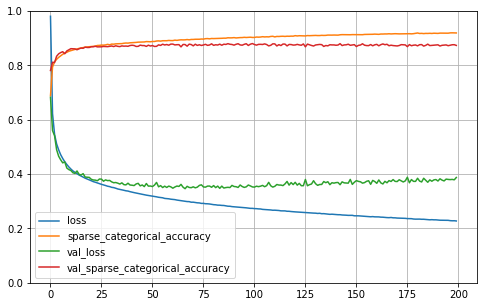

In [23]:
import pandas as pd
X=pd.DataFrame(history1.history)
X=X[:200]
X.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Model 2

<img src="./images/model2.png" width="450" border="1">

**Fig. 7**: Handling multiple inputs.

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
input_A = keras.layers.Input(shape=[400], name="wide_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_A)
input_B = keras.layers.Input(shape=[400], name="deep_input")
hidden11 = keras.layers.Dense(30, activation="relu")(input_B)
hidden12 = keras.layers.Dense(30, activation="relu")(hidden11)
concat = keras.layers.concatenate([hidden1, hidden12])
output = keras.layers.Dense(10, name="output",activation="softmax")(concat)
model2 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])


In [14]:
model2.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model1.h5", save_best_only=True)

In [15]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 400)]        0           []                               
                                                                                                  
 wide_input (InputLayer)        [(None, 400)]        0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 30)           12030       ['deep_input[0][0]']             
                                                                                                  
 dense (Dense)                  (None, 30)           12030       ['wide_input[0][0]']             
                                                                                              

In [16]:
X_train_A, X_train_B = X_train[:, :400], X_train[:, 384:]
X_valid_A, X_valid_B= X_valid[:, :400], X_valid[:, 384:]
X_test_A, X_test_B = X_test[:, :400], X_test[:, 384:]
X_new_A, X_new_B = X_test_A[:1000], X_test_B[:1000]



In [17]:
history2 = model2.fit((X_train_A, X_train_B), y_train, epochs=2000,
                    validation_data=((X_valid_A, X_valid_B), y_valid),callbacks=[checkpoint_cb])


Epoch 1/2000
1719/1719 [==============================] - 9s 4ms/step - loss: 0.9310 - sparse_categorical_accuracy: 0.6996 - val_loss: 0.6373 - val_sparse_categorical_accuracy: 0.7874
Epoch 2/2000
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5906 - sparse_categorical_accuracy: 0.8012 - val_loss: 0.5311 - val_sparse_categorical_accuracy: 0.8236
Epoch 3/2000
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5207 - sparse_categorical_accuracy: 0.8216 - val_loss: 0.5372 - val_sparse_categorical_accuracy: 0.8042
Epoch 4/2000
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4861 - sparse_categorical_accuracy: 0.8320 - val_loss: 0.4673 - val_sparse_categorical_accuracy: 0.8472
Epoch 5/2000
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4653 - sparse_categorical_accuracy: 0.8391 - val_loss: 0.4448 - val_sparse_categorical_accuracy: 0.8512
Epoch 6/2000
1719/1719 [==============================] - 5s 3ms/step - loss: 0.

1719/1719 [==============================] - 5s 3ms/step - loss: 0.2440 - sparse_categorical_accuracy: 0.9130 - val_loss: 0.3282 - val_sparse_categorical_accuracy: 0.8912
Epoch 90/2000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2428 - sparse_categorical_accuracy: 0.9135 - val_loss: 0.3265 - val_sparse_categorical_accuracy: 0.8908
Epoch 91/2000
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2418 - sparse_categorical_accuracy: 0.9140 - val_loss: 0.3273 - val_sparse_categorical_accuracy: 0.8866
Epoch 92/2000
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2408 - sparse_categorical_accuracy: 0.9149 - val_loss: 0.3277 - val_sparse_categorical_accuracy: 0.8882
Epoch 93/2000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2402 - sparse_categorical_accuracy: 0.9147 - val_loss: 0.3261 - val_sparse_categorical_accuracy: 0.8894
Epoch 94/2000
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2395 - s

1719/1719 [==============================] - 4s 2ms/step - loss: 0.1775 - sparse_categorical_accuracy: 0.9378 - val_loss: 0.3681 - val_sparse_categorical_accuracy: 0.8838
Epoch 204/2000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1766 - sparse_categorical_accuracy: 0.9387 - val_loss: 0.3768 - val_sparse_categorical_accuracy: 0.8846
Epoch 205/2000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1765 - sparse_categorical_accuracy: 0.9377 - val_loss: 0.3773 - val_sparse_categorical_accuracy: 0.8866
Epoch 206/2000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1760 - sparse_categorical_accuracy: 0.9387 - val_loss: 0.3638 - val_sparse_categorical_accuracy: 0.8884
Epoch 207/2000
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1760 - sparse_categorical_accuracy: 0.9390 - val_loss: 0.3739 - val_sparse_categorical_accuracy: 0.8864
Epoch 208/2000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.175

1719/1719 [==============================] - 7s 4ms/step - loss: 0.1480 - sparse_categorical_accuracy: 0.9480 - val_loss: 0.4030 - val_sparse_categorical_accuracy: 0.8860
Epoch 292/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1480 - sparse_categorical_accuracy: 0.9484 - val_loss: 0.4180 - val_sparse_categorical_accuracy: 0.8804
Epoch 293/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1478 - sparse_categorical_accuracy: 0.9496 - val_loss: 0.4029 - val_sparse_categorical_accuracy: 0.8830
Epoch 294/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1462 - sparse_categorical_accuracy: 0.9495 - val_loss: 0.4137 - val_sparse_categorical_accuracy: 0.8816
Epoch 295/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1462 - sparse_categorical_accuracy: 0.9495 - val_loss: 0.4348 - val_sparse_categorical_accuracy: 0.8750
Epoch 296/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.146

1719/1719 [==============================] - 7s 4ms/step - loss: 0.1266 - sparse_categorical_accuracy: 0.9571 - val_loss: 0.4897 - val_sparse_categorical_accuracy: 0.8796
Epoch 380/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1254 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.4697 - val_sparse_categorical_accuracy: 0.8812
Epoch 381/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1266 - sparse_categorical_accuracy: 0.9567 - val_loss: 0.4594 - val_sparse_categorical_accuracy: 0.8776
Epoch 382/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1253 - sparse_categorical_accuracy: 0.9569 - val_loss: 0.4757 - val_sparse_categorical_accuracy: 0.8698
Epoch 383/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1255 - sparse_categorical_accuracy: 0.9572 - val_loss: 0.4785 - val_sparse_categorical_accuracy: 0.8760
Epoch 384/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.124

1719/1719 [==============================] - 6s 4ms/step - loss: 0.1102 - sparse_categorical_accuracy: 0.9628 - val_loss: 0.5332 - val_sparse_categorical_accuracy: 0.8764
Epoch 468/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1101 - sparse_categorical_accuracy: 0.9623 - val_loss: 0.5191 - val_sparse_categorical_accuracy: 0.8752
Epoch 469/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1024 - sparse_categorical_accuracy: 0.9657 - val_loss: 0.5600 - val_sparse_categorical_accuracy: 0.8754
Epoch 514/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1017 - sparse_categorical_accuracy: 0.9653 - val_loss: 0.5595 - val_sparse_categorical_accuracy: 0.8712
Epoch 515/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1020 - sparse_categorical_accuracy: 0.9653 - val_loss: 0.5649 - val_sparse_categorical_accuracy: 0.8670
Epoch 516/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.100

1719/1719 [==============================] - 7s 4ms/step - loss: 0.0896 - sparse_categorical_accuracy: 0.9701 - val_loss: 0.6205 - val_sparse_categorical_accuracy: 0.8704
Epoch 600/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0897 - sparse_categorical_accuracy: 0.9700 - val_loss: 0.6060 - val_sparse_categorical_accuracy: 0.8678
Epoch 601/2000
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0893 - sparse_categorical_accuracy: 0.9700 - val_loss: 0.6300 - val_sparse_categorical_accuracy: 0.8654
Epoch 602/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0885 - sparse_categorical_accuracy: 0.9702 - val_loss: 0.6121 - val_sparse_categorical_accuracy: 0.8732
Epoch 603/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0896 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.6231 - val_sparse_categorical_accuracy: 0.8686
Epoch 604/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.089

1719/1719 [==============================] - 7s 4ms/step - loss: 0.0689 - sparse_categorical_accuracy: 0.9774 - val_loss: 0.7423 - val_sparse_categorical_accuracy: 0.8678
Epoch 789/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0685 - sparse_categorical_accuracy: 0.9775 - val_loss: 0.7838 - val_sparse_categorical_accuracy: 0.8686
Epoch 790/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0682 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.7451 - val_sparse_categorical_accuracy: 0.8672
Epoch 791/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0680 - sparse_categorical_accuracy: 0.9779 - val_loss: 0.7563 - val_sparse_categorical_accuracy: 0.8694
Epoch 792/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0665 - sparse_categorical_accuracy: 0.9779 - val_loss: 0.7501 - val_sparse_categorical_accuracy: 0.8704
Epoch 793/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.068

1719/1719 [==============================] - 6s 4ms/step - loss: 0.0581 - sparse_categorical_accuracy: 0.9816 - val_loss: 0.8217 - val_sparse_categorical_accuracy: 0.8692
Epoch 897/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0587 - sparse_categorical_accuracy: 0.9810 - val_loss: 0.8389 - val_sparse_categorical_accuracy: 0.8614
Epoch 898/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0594 - sparse_categorical_accuracy: 0.9809 - val_loss: 0.8249 - val_sparse_categorical_accuracy: 0.8676
Epoch 899/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0597 - sparse_categorical_accuracy: 0.9807 - val_loss: 0.8369 - val_sparse_categorical_accuracy: 0.8690
Epoch 900/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0587 - sparse_categorical_accuracy: 0.9812 - val_loss: 0.8387 - val_sparse_categorical_accuracy: 0.8650
Epoch 901/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.059

1719/1719 [==============================] - 6s 4ms/step - loss: 0.0526 - sparse_categorical_accuracy: 0.9838 - val_loss: 0.9364 - val_sparse_categorical_accuracy: 0.8656
Epoch 1004/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0512 - sparse_categorical_accuracy: 0.9836 - val_loss: 0.9275 - val_sparse_categorical_accuracy: 0.8644
Epoch 1005/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0505 - sparse_categorical_accuracy: 0.9841 - val_loss: 0.9220 - val_sparse_categorical_accuracy: 0.8666
Epoch 1006/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0517 - sparse_categorical_accuracy: 0.9835 - val_loss: 0.9350 - val_sparse_categorical_accuracy: 0.8642
Epoch 1007/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0514 - sparse_categorical_accuracy: 0.9838 - val_loss: 0.9129 - val_sparse_categorical_accuracy: 0.8670
Epoch 1008/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 

Epoch 1047/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0496 - sparse_categorical_accuracy: 0.9842 - val_loss: 0.9332 - val_sparse_categorical_accuracy: 0.8624
Epoch 1048/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0488 - sparse_categorical_accuracy: 0.9842 - val_loss: 0.9513 - val_sparse_categorical_accuracy: 0.8636
Epoch 1049/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0472 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.9594 - val_sparse_categorical_accuracy: 0.8664
Epoch 1050/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0472 - sparse_categorical_accuracy: 0.9853 - val_loss: 0.9808 - val_sparse_categorical_accuracy: 0.8650
Epoch 1051/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0492 - sparse_categorical_accuracy: 0.9841 - val_loss: 0.9518 - val_sparse_categorical_accuracy: 0.8604
Epoch 1052/2000
1719/1719 [==============================] - 8s 4

Epoch 1091/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0470 - sparse_categorical_accuracy: 0.9847 - val_loss: 1.0383 - val_sparse_categorical_accuracy: 0.8612
Epoch 1092/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0471 - sparse_categorical_accuracy: 0.9849 - val_loss: 1.0170 - val_sparse_categorical_accuracy: 0.8624
Epoch 1093/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0451 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.9916 - val_sparse_categorical_accuracy: 0.8644
Epoch 1094/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0455 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.9828 - val_sparse_categorical_accuracy: 0.8594
Epoch 1095/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0447 - sparse_categorical_accuracy: 0.9854 - val_loss: 0.9766 - val_sparse_categorical_accuracy: 0.8652
Epoch 1096/2000
1719/1719 [==============================] - 6s 4

Epoch 1135/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0416 - sparse_categorical_accuracy: 0.9878 - val_loss: 1.0090 - val_sparse_categorical_accuracy: 0.8650
Epoch 1136/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0422 - sparse_categorical_accuracy: 0.9869 - val_loss: 1.0147 - val_sparse_categorical_accuracy: 0.8632
Epoch 1137/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0437 - sparse_categorical_accuracy: 0.9857 - val_loss: 1.0305 - val_sparse_categorical_accuracy: 0.8650
Epoch 1162/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0414 - sparse_categorical_accuracy: 0.9868 - val_loss: 1.0372 - val_sparse_categorical_accuracy: 0.8660
Epoch 1163/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0405 - sparse_categorical_accuracy: 0.9874 - val_loss: 1.0136 - val_sparse_categorical_accuracy: 0.8628
Epoch 1164/2000
1719/1719 [==============================] - 7s 4

Epoch 1203/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0390 - sparse_categorical_accuracy: 0.9881 - val_loss: 1.0962 - val_sparse_categorical_accuracy: 0.8618
Epoch 1204/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0395 - sparse_categorical_accuracy: 0.9883 - val_loss: 1.0629 - val_sparse_categorical_accuracy: 0.8662
Epoch 1205/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0384 - sparse_categorical_accuracy: 0.9885 - val_loss: 1.0643 - val_sparse_categorical_accuracy: 0.8628
Epoch 1206/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0392 - sparse_categorical_accuracy: 0.9879 - val_loss: 1.0559 - val_sparse_categorical_accuracy: 0.8618
Epoch 1207/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0378 - sparse_categorical_accuracy: 0.9884 - val_loss: 1.0684 - val_sparse_categorical_accuracy: 0.8610
Epoch 1208/2000
1719/1719 [==============================] - 6s 4

Epoch 1267/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0367 - sparse_categorical_accuracy: 0.9886 - val_loss: 1.1081 - val_sparse_categorical_accuracy: 0.8610
Epoch 1268/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0358 - sparse_categorical_accuracy: 0.9891 - val_loss: 1.1473 - val_sparse_categorical_accuracy: 0.8630
Epoch 1269/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0358 - sparse_categorical_accuracy: 0.9890 - val_loss: 1.1002 - val_sparse_categorical_accuracy: 0.8620
Epoch 1270/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0368 - sparse_categorical_accuracy: 0.9885 - val_loss: 1.1282 - val_sparse_categorical_accuracy: 0.8662
Epoch 1271/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0367 - sparse_categorical_accuracy: 0.9885 - val_loss: 1.1167 - val_sparse_categorical_accuracy: 0.8634
Epoch 1272/2000
1719/1719 [==============================] - 6s 4

Epoch 1326/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0325 - sparse_categorical_accuracy: 0.9902 - val_loss: 1.1674 - val_sparse_categorical_accuracy: 0.8636
Epoch 1327/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0342 - sparse_categorical_accuracy: 0.9890 - val_loss: 1.1822 - val_sparse_categorical_accuracy: 0.8618
Epoch 1328/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0303 - sparse_categorical_accuracy: 0.9916 - val_loss: 1.1560 - val_sparse_categorical_accuracy: 0.8592
Epoch 1329/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0355 - sparse_categorical_accuracy: 0.9885 - val_loss: 1.1551 - val_sparse_categorical_accuracy: 0.8630
Epoch 1330/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0321 - sparse_categorical_accuracy: 0.9902 - val_loss: 1.1508 - val_sparse_categorical_accuracy: 0.8594
Epoch 1331/2000
1719/1719 [==============================] - 6s 4

Epoch 1370/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0339 - sparse_categorical_accuracy: 0.9892 - val_loss: 1.1825 - val_sparse_categorical_accuracy: 0.8616
Epoch 1371/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0328 - sparse_categorical_accuracy: 0.9893 - val_loss: 1.1762 - val_sparse_categorical_accuracy: 0.8648
Epoch 1372/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0330 - sparse_categorical_accuracy: 0.9898 - val_loss: 1.1689 - val_sparse_categorical_accuracy: 0.8656
Epoch 1373/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0338 - sparse_categorical_accuracy: 0.9898 - val_loss: 1.1727 - val_sparse_categorical_accuracy: 0.8604
Epoch 1374/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0309 - sparse_categorical_accuracy: 0.9908 - val_loss: 1.1752 - val_sparse_categorical_accuracy: 0.8622
Epoch 1375/2000
1719/1719 [==============================] - 6s 4

Epoch 1414/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0320 - sparse_categorical_accuracy: 0.9903 - val_loss: 1.2272 - val_sparse_categorical_accuracy: 0.8584
Epoch 1415/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0319 - sparse_categorical_accuracy: 0.9899 - val_loss: 1.2106 - val_sparse_categorical_accuracy: 0.8602
Epoch 1416/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0287 - sparse_categorical_accuracy: 0.9914 - val_loss: 1.2180 - val_sparse_categorical_accuracy: 0.8630
Epoch 1417/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0292 - sparse_categorical_accuracy: 0.9912 - val_loss: 1.1986 - val_sparse_categorical_accuracy: 0.8622
Epoch 1418/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0301 - sparse_categorical_accuracy: 0.9909 - val_loss: 1.2211 - val_sparse_categorical_accuracy: 0.8602
Epoch 1419/2000
1719/1719 [==============================] - 6s 4

Epoch 1458/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0298 - sparse_categorical_accuracy: 0.9908 - val_loss: 1.2391 - val_sparse_categorical_accuracy: 0.8620
Epoch 1459/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0270 - sparse_categorical_accuracy: 0.9921 - val_loss: 1.3134 - val_sparse_categorical_accuracy: 0.8588
Epoch 1460/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0254 - sparse_categorical_accuracy: 0.9927 - val_loss: 1.2287 - val_sparse_categorical_accuracy: 0.8616
Epoch 1461/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0283 - sparse_categorical_accuracy: 0.9914 - val_loss: 1.2869 - val_sparse_categorical_accuracy: 0.8574
Epoch 1462/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0271 - sparse_categorical_accuracy: 0.9918 - val_loss: 1.2495 - val_sparse_categorical_accuracy: 0.8582
Epoch 1463/2000
1719/1719 [==============================] - 6s 4

Epoch 1527/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0243 - sparse_categorical_accuracy: 0.9928 - val_loss: 1.2909 - val_sparse_categorical_accuracy: 0.8612
Epoch 1528/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0264 - sparse_categorical_accuracy: 0.9924 - val_loss: 1.2847 - val_sparse_categorical_accuracy: 0.8598
Epoch 1529/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0278 - sparse_categorical_accuracy: 0.9918 - val_loss: 1.2879 - val_sparse_categorical_accuracy: 0.8600
Epoch 1530/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0242 - sparse_categorical_accuracy: 0.9931 - val_loss: 1.2894 - val_sparse_categorical_accuracy: 0.8608
Epoch 1531/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0267 - sparse_categorical_accuracy: 0.9919 - val_loss: 1.2907 - val_sparse_categorical_accuracy: 0.8588
Epoch 1532/2000
1719/1719 [==============================] - 6s 4

Epoch 1571/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0239 - sparse_categorical_accuracy: 0.9930 - val_loss: 1.3151 - val_sparse_categorical_accuracy: 0.8614
Epoch 1572/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0237 - sparse_categorical_accuracy: 0.9930 - val_loss: 1.3215 - val_sparse_categorical_accuracy: 0.8592
Epoch 1573/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0222 - sparse_categorical_accuracy: 0.9937 - val_loss: 1.3412 - val_sparse_categorical_accuracy: 0.8598
Epoch 1574/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0224 - sparse_categorical_accuracy: 0.9939 - val_loss: 1.3264 - val_sparse_categorical_accuracy: 0.8622
Epoch 1575/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0261 - sparse_categorical_accuracy: 0.9920 - val_loss: 1.3284 - val_sparse_categorical_accuracy: 0.8596
Epoch 1576/2000
1719/1719 [==============================] - 6s 4

Epoch 1615/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0218 - sparse_categorical_accuracy: 0.9937 - val_loss: 1.3468 - val_sparse_categorical_accuracy: 0.8636
Epoch 1616/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0234 - sparse_categorical_accuracy: 0.9930 - val_loss: 1.3530 - val_sparse_categorical_accuracy: 0.8628
Epoch 1617/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0223 - sparse_categorical_accuracy: 0.9932 - val_loss: 1.3499 - val_sparse_categorical_accuracy: 0.8626
Epoch 1618/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0214 - sparse_categorical_accuracy: 0.9937 - val_loss: 1.3526 - val_sparse_categorical_accuracy: 0.8616
Epoch 1619/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0241 - sparse_categorical_accuracy: 0.9929 - val_loss: 1.3609 - val_sparse_categorical_accuracy: 0.8600
Epoch 1620/2000
1719/1719 [==============================] - 6s 4

Epoch 1688/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0204 - sparse_categorical_accuracy: 0.9943 - val_loss: 1.4278 - val_sparse_categorical_accuracy: 0.8576
Epoch 1689/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0241 - sparse_categorical_accuracy: 0.9928 - val_loss: 1.3914 - val_sparse_categorical_accuracy: 0.8584
Epoch 1690/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0201 - sparse_categorical_accuracy: 0.9943 - val_loss: 1.4189 - val_sparse_categorical_accuracy: 0.8614
Epoch 1691/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0180 - sparse_categorical_accuracy: 0.9950 - val_loss: 1.4101 - val_sparse_categorical_accuracy: 0.8584
Epoch 1692/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0209 - sparse_categorical_accuracy: 0.9943 - val_loss: 1.4045 - val_sparse_categorical_accuracy: 0.8578
Epoch 1693/2000
1719/1719 [==============================] - 6s 4

Epoch 1732/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0191 - sparse_categorical_accuracy: 0.9943 - val_loss: 1.4373 - val_sparse_categorical_accuracy: 0.8594
Epoch 1733/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0193 - sparse_categorical_accuracy: 0.9946 - val_loss: 1.4877 - val_sparse_categorical_accuracy: 0.8594
Epoch 1734/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0195 - sparse_categorical_accuracy: 0.9948 - val_loss: 1.4580 - val_sparse_categorical_accuracy: 0.8594
Epoch 1735/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0202 - sparse_categorical_accuracy: 0.9940 - val_loss: 1.4381 - val_sparse_categorical_accuracy: 0.8604
Epoch 1736/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0210 - sparse_categorical_accuracy: 0.9939 - val_loss: 1.4217 - val_sparse_categorical_accuracy: 0.8610
Epoch 1737/2000
1719/1719 [==============================] - 6s 4

Epoch 1776/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0171 - sparse_categorical_accuracy: 0.9949 - val_loss: 1.4610 - val_sparse_categorical_accuracy: 0.8580
Epoch 1777/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0169 - sparse_categorical_accuracy: 0.9956 - val_loss: 1.4505 - val_sparse_categorical_accuracy: 0.8612
Epoch 1778/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0177 - sparse_categorical_accuracy: 0.9951 - val_loss: 1.4747 - val_sparse_categorical_accuracy: 0.8590
Epoch 1779/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0163 - sparse_categorical_accuracy: 0.9957 - val_loss: 1.4660 - val_sparse_categorical_accuracy: 0.8592
Epoch 1780/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0140 - sparse_categorical_accuracy: 0.9964 - val_loss: 1.4782 - val_sparse_categorical_accuracy: 0.8586
Epoch 1781/2000
1719/1719 [==============================] - 6s 4

Epoch 1820/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0154 - sparse_categorical_accuracy: 0.9960 - val_loss: 1.5281 - val_sparse_categorical_accuracy: 0.8546
Epoch 1821/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0147 - sparse_categorical_accuracy: 0.9963 - val_loss: 1.5127 - val_sparse_categorical_accuracy: 0.8580
Epoch 1822/2000
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0155 - sparse_categorical_accuracy: 0.9961 - val_loss: 1.5066 - val_sparse_categorical_accuracy: 0.8586
Epoch 1823/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0134 - sparse_categorical_accuracy: 0.9967 - val_loss: 1.4959 - val_sparse_categorical_accuracy: 0.8576
Epoch 1824/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0149 - sparse_categorical_accuracy: 0.9961 - val_loss: 1.4917 - val_sparse_categorical_accuracy: 0.8636
Epoch 1825/2000
1719/1719 [==============================] - 7s 4

Epoch 1864/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0137 - sparse_categorical_accuracy: 0.9963 - val_loss: 1.5102 - val_sparse_categorical_accuracy: 0.8620
Epoch 1865/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0179 - sparse_categorical_accuracy: 0.9947 - val_loss: 1.5157 - val_sparse_categorical_accuracy: 0.8604
Epoch 1866/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0143 - sparse_categorical_accuracy: 0.9962 - val_loss: 1.5055 - val_sparse_categorical_accuracy: 0.8598
Epoch 1867/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0138 - sparse_categorical_accuracy: 0.9964 - val_loss: 1.5191 - val_sparse_categorical_accuracy: 0.8600
Epoch 1868/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0145 - sparse_categorical_accuracy: 0.9963 - val_loss: 1.5188 - val_sparse_categorical_accuracy: 0.8628
Epoch 1869/2000
1719/1719 [==============================] - 6s 4

Epoch 1962/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0112 - sparse_categorical_accuracy: 0.9975 - val_loss: 1.5805 - val_sparse_categorical_accuracy: 0.8576
Epoch 1963/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0128 - sparse_categorical_accuracy: 0.9964 - val_loss: 1.5740 - val_sparse_categorical_accuracy: 0.8582
Epoch 1964/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0113 - sparse_categorical_accuracy: 0.9973 - val_loss: 1.5732 - val_sparse_categorical_accuracy: 0.8586
Epoch 1965/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0104 - sparse_categorical_accuracy: 0.9976 - val_loss: 1.5837 - val_sparse_categorical_accuracy: 0.8600
Epoch 1966/2000
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0144 - sparse_categorical_accuracy: 0.9962 - val_loss: 1.6054 - val_sparse_categorical_accuracy: 0.8574
Epoch 1967/2000
1719/1719 [==============================] - 6s 4

Loading saved best version of the models and evaluating them using the test dataset. 

In [18]:
model2 = keras.models.load_model("my_keras_model2.h5") # rollback to best model
y_pred_main2= model2.evaluate((X_test_A, X_test_B),y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6682 - sparse_categorical_accuracy: 0.8536


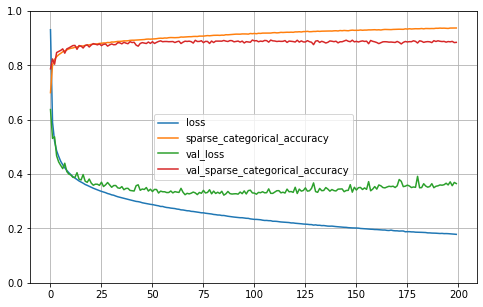

In [19]:
import pandas as pd
X2=pd.DataFrame(history2.history)
X2=X2[:200]
X2.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Model 3

<img src="./images/model3.png" width="400" border="1">

**Fig. 7**: Handling multiple inputs.

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
input_A = keras.layers.Input(shape=[300], name="wide_input")
input_B = keras.layers.Input(shape=[300], name="deep_input1")
input_c = keras.layers.Input(shape=[300], name="deep_input2")
hidden1 = keras.layers.Dense(30, activation="relu")(input_A)
hidden11 = keras.layers.Dense(30, activation="relu")(input_B)
hidden12 = keras.layers.Dense(30, activation="relu")(hidden11)
hidden21 = keras.layers.Dense(30, activation="relu")(input_c)
hidden22 = keras.layers.Dense(30, activation="relu")(hidden21)
hidden33 = keras.layers.Dense(30, activation="relu")(hidden22)

concat = keras.layers.concatenate([hidden1, hidden12,hidden33])
output = keras.layers.Dense(10, name="output",activation="softmax")(concat)
model3 = keras.models.Model(inputs=[input_A, input_B,input_c], outputs=[output])


In [14]:
X_train_A, X_train_B ,X_train_C = X_train[:, :300], X_train[:, 243:543],X_train[:,484:]
X_valid_A, X_valid_B ,X_valid_C = X_valid[:, :300], X_valid[:, 243:543],X_valid[:,484:]
X_test_A, X_test_B,X_test_C= X_test[:, :300], X_test[:, 243:543],X_test[:,484:]

X_new_A, X_new_B, X_new_C= X_test_A[:1000], X_test_B[:1000],X_test_C[:1000]



In [28]:
model3.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model3.h5", save_best_only=True)


In [29]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input2 (InputLayer)       [(None, 300)]        0           []                               
                                                                                                  
 deep_input1 (InputLayer)       [(None, 300)]        0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           9030        ['deep_input2[0][0]']            
                                                                                                  
 wide_input (InputLayer)        [(None, 300)]        0           []                               
                                                                                              

In [31]:
history3 = model3.fit((X_train_A, X_train_B,X_train_C), y_train, epochs=1700,
                    validation_data=((X_valid_A, X_valid_B,X_valid_C), y_valid),callbacks=[checkpoint_cb])


Epoch 1/1700
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1920 - sparse_categorical_accuracy: 0.9321 - val_loss: 0.3353 - val_sparse_categorical_accuracy: 0.8900
Epoch 2/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1907 - sparse_categorical_accuracy: 0.9323 - val_loss: 0.3323 - val_sparse_categorical_accuracy: 0.8898
Epoch 3/1700
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1900 - sparse_categorical_accuracy: 0.9334 - val_loss: 0.3518 - val_sparse_categorical_accuracy: 0.8838
Epoch 4/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1902 - sparse_categorical_accuracy: 0.9344 - val_loss: 0.3298 - val_sparse_categorical_accuracy: 0.8896
Epoch 5/1700
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1903 - sparse_categorical_accuracy: 0.9329 - val_loss: 0.3235 - val_sparse_categorical_accuracy: 0.8910
Epoch 6/1700
1719/1719 [==============================] - 6s 4ms/step - loss: 0.

1719/1719 [==============================] - 6s 4ms/step - loss: 0.1263 - sparse_categorical_accuracy: 0.9574 - val_loss: 0.4344 - val_sparse_categorical_accuracy: 0.8826
Epoch 146/1700
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1255 - sparse_categorical_accuracy: 0.9565 - val_loss: 0.4249 - val_sparse_categorical_accuracy: 0.8892
Epoch 147/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1254 - sparse_categorical_accuracy: 0.9570 - val_loss: 0.4292 - val_sparse_categorical_accuracy: 0.8828
Epoch 148/1700
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1251 - sparse_categorical_accuracy: 0.9575 - val_loss: 0.4572 - val_sparse_categorical_accuracy: 0.8822
Epoch 149/1700
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1252 - sparse_categorical_accuracy: 0.9571 - val_loss: 0.4221 - val_sparse_categorical_accuracy: 0.8854
Epoch 150/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.123

1719/1719 [==============================] - 6s 4ms/step - loss: 0.0915 - sparse_categorical_accuracy: 0.9687 - val_loss: 0.5694 - val_sparse_categorical_accuracy: 0.8750
Epoch 267/1700
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0910 - sparse_categorical_accuracy: 0.9688 - val_loss: 0.5441 - val_sparse_categorical_accuracy: 0.8784
Epoch 268/1700
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0905 - sparse_categorical_accuracy: 0.9700 - val_loss: 0.5434 - val_sparse_categorical_accuracy: 0.8772
Epoch 269/1700
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0902 - sparse_categorical_accuracy: 0.9692 - val_loss: 0.5479 - val_sparse_categorical_accuracy: 0.8750
Epoch 270/1700
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0902 - sparse_categorical_accuracy: 0.9692 - val_loss: 0.5310 - val_sparse_categorical_accuracy: 0.8814
Epoch 271/1700
1719/1719 [==============================] - 6s 3ms/step - loss: 0.088

1719/1719 [==============================] - 7s 4ms/step - loss: 0.0457 - sparse_categorical_accuracy: 0.9857 - val_loss: 0.7879 - val_sparse_categorical_accuracy: 0.8756
Epoch 507/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0479 - sparse_categorical_accuracy: 0.9847 - val_loss: 0.7939 - val_sparse_categorical_accuracy: 0.8740
Epoch 508/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0494 - sparse_categorical_accuracy: 0.9842 - val_loss: 0.7945 - val_sparse_categorical_accuracy: 0.8750
Epoch 509/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0485 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.7853 - val_sparse_categorical_accuracy: 0.8750
Epoch 510/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0477 - sparse_categorical_accuracy: 0.9845 - val_loss: 0.7753 - val_sparse_categorical_accuracy: 0.8778
Epoch 511/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.048

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1719/1719 [==============================] - 8s 5ms/step - loss: 0.0423 - sparse_categorical_accuracy: 0.9867 - val_loss: 0.8730 - val_sparse_categorical_accuracy: 0.8786
Epoch 548/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0426 - sparse_categorical_accuracy: 0.9861 - val_loss: 0.8577 - val_sparse_categorical_accuracy: 0.8742
Epoch 549/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0401 - sparse_categorical_accuracy: 0.9876 - val_loss: 0.8259 - val_sparse_categorical_accuracy: 0.8770
Epoch 550/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0438 - sparse_categorical_accuracy: 0.9863 - val_loss: 0.8267 - val_sparse_categorical_accuracy: 0.8748
Epoch 551/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0423 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.8447 - val_sparse_categorical_accuracy: 0.8784
Epoch 552/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.040

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1719/1719 [==============================] - 7s 4ms/step - loss: 0.0387 - sparse_categorical_accuracy: 0.9871 - val_loss: 0.9000 - val_sparse_categorical_accuracy: 0.8726
Epoch 609/1700
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0378 - sparse_categorical_accuracy: 0.9881 - val_loss: 0.8763 - val_sparse_categorical_accuracy: 0.8758
Epoch 610/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0360 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.8878 - val_sparse_categorical_accuracy: 0.8724
Epoch 611/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0364 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.8896 - val_sparse_categorical_accuracy: 0.8720
Epoch 612/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0370 - sparse_categorical_accuracy: 0.9880 - val_loss: 0.8870 - val_sparse_categorical_accuracy: 0.8772
Epoch 613/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.034

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1719/1719 [==============================] - 7s 4ms/step - loss: 0.0322 - sparse_categorical_accuracy: 0.9899 - val_loss: 0.9383 - val_sparse_categorical_accuracy: 0.8750
Epoch 659/1700
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0328 - sparse_categorical_accuracy: 0.9896 - val_loss: 0.9440 - val_sparse_categorical_accuracy: 0.8778
Epoch 660/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0307 - sparse_categorical_accuracy: 0.9909 - val_loss: 0.9389 - val_sparse_categorical_accuracy: 0.8786
Epoch 661/1700
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0305 - sparse_categorical_accuracy: 0.9910 - val_loss: 0.9834 - val_sparse_categorical_accuracy: 0.8698
Epoch 662/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0301 - sparse_categorical_accuracy: 0.9907 - val_loss: 0.9662 - val_sparse_categorical_accuracy: 0.8746
Epoch 663/1700
1719/1719 [==============================] - 8s 4ms/step - loss: 0.032

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1719/1719 [==============================] - 8s 5ms/step - loss: 0.0266 - sparse_categorical_accuracy: 0.9918 - val_loss: 1.0315 - val_sparse_categorical_accuracy: 0.8726
Epoch 729/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0282 - sparse_categorical_accuracy: 0.9912 - val_loss: 1.0151 - val_sparse_categorical_accuracy: 0.8780
Epoch 730/1700
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0243 - sparse_categorical_accuracy: 0.9928 - val_loss: 1.0145 - val_sparse_categorical_accuracy: 0.8712
Epoch 731/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0281 - sparse_categorical_accuracy: 0.9906 - val_loss: 1.0558 - val_sparse_categorical_accuracy: 0.8736
Epoch 732/1700
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0257 - sparse_categorical_accuracy: 0.9922 - val_loss: 1.0189 - val_sparse_categorical_accuracy: 0.8770
Epoch 733/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.025

1719/1719 [==============================] - 7s 4ms/step - loss: 0.0119 - sparse_categorical_accuracy: 0.9975 - val_loss: 1.1914 - val_sparse_categorical_accuracy: 0.8772
Epoch 905/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0109 - sparse_categorical_accuracy: 0.9977 - val_loss: 1.2100 - val_sparse_categorical_accuracy: 0.8758
Epoch 906/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0127 - sparse_categorical_accuracy: 0.9971 - val_loss: 1.1926 - val_sparse_categorical_accuracy: 0.8782
Epoch 907/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0122 - sparse_categorical_accuracy: 0.9969 - val_loss: 1.2072 - val_sparse_categorical_accuracy: 0.8766
Epoch 908/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0150 - sparse_categorical_accuracy: 0.9958 - val_loss: 1.2394 - val_sparse_categorical_accuracy: 0.8768
Epoch 909/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.014

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1719/1719 [==============================] - 7s 4ms/step - loss: 0.0099 - sparse_categorical_accuracy: 0.9981 - val_loss: 1.2413 - val_sparse_categorical_accuracy: 0.8760
Epoch 937/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0115 - sparse_categorical_accuracy: 0.9975 - val_loss: 1.2410 - val_sparse_categorical_accuracy: 0.8752
Epoch 938/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0117 - sparse_categorical_accuracy: 0.9973 - val_loss: 1.2179 - val_sparse_categorical_accuracy: 0.8776
Epoch 939/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0092 - sparse_categorical_accuracy: 0.9983 - val_loss: 1.2285 - val_sparse_categorical_accuracy: 0.8782
Epoch 940/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0106 - sparse_categorical_accuracy: 0.9976 - val_loss: 1.2408 - val_sparse_categorical_accuracy: 0.8758
Epoch 941/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.010

Epoch 1034/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0131 - sparse_categorical_accuracy: 0.9963 - val_loss: 1.2954 - val_sparse_categorical_accuracy: 0.8756
Epoch 1035/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0067 - sparse_categorical_accuracy: 0.9989 - val_loss: 1.3118 - val_sparse_categorical_accuracy: 0.8774
Epoch 1036/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0057 - sparse_categorical_accuracy: 0.9993 - val_loss: 1.2999 - val_sparse_categorical_accuracy: 0.8776
Epoch 1037/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0105 - sparse_categorical_accuracy: 0.9972 - val_loss: 1.3067 - val_sparse_categorical_accuracy: 0.8780
Epoch 1038/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0051 - sparse_categorical_accuracy: 0.9995 - val_loss: 1.3140 - val_sparse_categorical_accuracy: 0.8784
Epoch 1039/1700
1719/1719 [==============================] - 7s 4

Epoch 1078/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0039 - sparse_categorical_accuracy: 0.9998 - val_loss: 1.3489 - val_sparse_categorical_accuracy: 0.8758
Epoch 1079/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0044 - sparse_categorical_accuracy: 0.9995 - val_loss: 1.3553 - val_sparse_categorical_accuracy: 0.8756
Epoch 1080/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0042 - sparse_categorical_accuracy: 0.9997 - val_loss: 1.3783 - val_sparse_categorical_accuracy: 0.8758
Epoch 1081/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0055 - sparse_categorical_accuracy: 0.9992 - val_loss: 1.3487 - val_sparse_categorical_accuracy: 0.8760
Epoch 1082/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0034 - sparse_categorical_accuracy: 0.9999 - val_loss: 1.3504 - val_sparse_categorical_accuracy: 0.8776
Epoch 1083/1700
1719/1719 [==============================] - 7s 4

Epoch 1122/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0025 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.3915 - val_sparse_categorical_accuracy: 0.8764
Epoch 1123/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0025 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.3846 - val_sparse_categorical_accuracy: 0.8764
Epoch 1124/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0024 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.3898 - val_sparse_categorical_accuracy: 0.8752
Epoch 1125/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0025 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.3820 - val_sparse_categorical_accuracy: 0.8744
Epoch 1126/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0026 - sparse_categorical_accuracy: 0.9999 - val_loss: 1.3886 - val_sparse_categorical_accuracy: 0.8772
Epoch 1127/1700
1719/1719 [==============================] - 7s 4

Epoch 1166/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0021 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4205 - val_sparse_categorical_accuracy: 0.8768
Epoch 1167/1700
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0021 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4244 - val_sparse_categorical_accuracy: 0.8756
Epoch 1168/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0020 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4188 - val_sparse_categorical_accuracy: 0.8758
Epoch 1169/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0026 - sparse_categorical_accuracy: 0.9998 - val_loss: 1.4205 - val_sparse_categorical_accuracy: 0.8758
Epoch 1170/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0021 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4210 - val_sparse_categorical_accuracy: 0.8750
Epoch 1171/1700
1719/1719 [==============================] - 7s 4

Epoch 1223/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0027 - sparse_categorical_accuracy: 0.9999 - val_loss: 1.4057 - val_sparse_categorical_accuracy: 0.8780
Epoch 1224/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0022 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4084 - val_sparse_categorical_accuracy: 0.8754
Epoch 1225/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0023 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4053 - val_sparse_categorical_accuracy: 0.8764
Epoch 1226/1700
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0022 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4055 - val_sparse_categorical_accuracy: 0.8764
Epoch 1227/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0021 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4119 - val_sparse_categorical_accuracy: 0.8768
Epoch 1228/1700
1719/1719 [==============================] - 8s 4

Epoch 1305/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0016 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4644 - val_sparse_categorical_accuracy: 0.8760
Epoch 1306/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0016 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4667 - val_sparse_categorical_accuracy: 0.8768
Epoch 1307/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0016 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4636 - val_sparse_categorical_accuracy: 0.8764
Epoch 1308/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0015 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4666 - val_sparse_categorical_accuracy: 0.8762
Epoch 1309/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0016 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4653 - val_sparse_categorical_accuracy: 0.8760
Epoch 1310/1700
1719/1719 [==============================] - 7s 4

Epoch 1349/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0014 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4870 - val_sparse_categorical_accuracy: 0.8758
Epoch 1350/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0014 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4938 - val_sparse_categorical_accuracy: 0.8770
Epoch 1351/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0014 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4908 - val_sparse_categorical_accuracy: 0.8758
Epoch 1352/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0014 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4897 - val_sparse_categorical_accuracy: 0.8764
Epoch 1353/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0014 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4929 - val_sparse_categorical_accuracy: 0.8768
Epoch 1354/1700
1719/1719 [==============================] - 7s 4

Epoch 1412/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0012 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5229 - val_sparse_categorical_accuracy: 0.8752
Epoch 1413/1700
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0012 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5230 - val_sparse_categorical_accuracy: 0.8760
Epoch 1414/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0012 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5232 - val_sparse_categorical_accuracy: 0.8754
Epoch 1415/1700
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0012 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5245 - val_sparse_categorical_accuracy: 0.8766
Epoch 1416/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0012 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5224 - val_sparse_categorical_accuracy: 0.8760
Epoch 1417/1700
1719/1719 [==============================] - 7s 4

Epoch 1456/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0011 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5393 - val_sparse_categorical_accuracy: 0.8760
Epoch 1457/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0011 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5419 - val_sparse_categorical_accuracy: 0.8766
Epoch 1458/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0011 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5404 - val_sparse_categorical_accuracy: 0.8766
Epoch 1459/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0011 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5439 - val_sparse_categorical_accuracy: 0.8756
Epoch 1460/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0011 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5445 - val_sparse_categorical_accuracy: 0.8762
Epoch 1461/1700
1719/1719 [==============================] - 7s 4

Epoch 1525/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 9.9828e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5697 - val_sparse_categorical_accuracy: 0.8768
Epoch 1526/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0010 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5685 - val_sparse_categorical_accuracy: 0.8748
Epoch 1527/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0010 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5686 - val_sparse_categorical_accuracy: 0.8764
Epoch 1528/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 9.9835e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5689 - val_sparse_categorical_accuracy: 0.8756
Epoch 1529/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 9.9661e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5709 - val_sparse_categorical_accuracy: 0.8762
Epoch 1530/1700
1719/1719 [==========================

Epoch 1577/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 9.2100e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5921 - val_sparse_categorical_accuracy: 0.8758
Epoch 1578/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 9.3160e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5926 - val_sparse_categorical_accuracy: 0.8764
Epoch 1579/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 9.2223e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5918 - val_sparse_categorical_accuracy: 0.8748
Epoch 1580/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 9.1945e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5940 - val_sparse_categorical_accuracy: 0.8764
Epoch 1581/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 9.1999e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5909 - val_sparse_categorical_accuracy: 0.8760
Epoch 1582/1700
1719/1719 [==================

Epoch 1620/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 8.7230e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.6083 - val_sparse_categorical_accuracy: 0.8758
Epoch 1621/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 8.7481e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.6070 - val_sparse_categorical_accuracy: 0.8762
Epoch 1622/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 8.6821e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.6080 - val_sparse_categorical_accuracy: 0.8762
Epoch 1623/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 8.7336e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.6059 - val_sparse_categorical_accuracy: 0.8768
Epoch 1624/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 8.6583e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.6097 - val_sparse_categorical_accuracy: 0.8766
Epoch 1625/1700
1719/1719 [==================

Epoch 1683/1700
1719/1719 [==============================] - 8s 5ms/step - loss: 7.9983e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.6250 - val_sparse_categorical_accuracy: 0.8760
Epoch 1684/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 7.8248e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.6343 - val_sparse_categorical_accuracy: 0.8760
Epoch 1698/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 7.8443e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.6315 - val_sparse_categorical_accuracy: 0.8756
Epoch 1699/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 7.8313e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.6320 - val_sparse_categorical_accuracy: 0.8756
Epoch 1700/1700
1719/1719 [==============================] - 7s 4ms/step - loss: 7.8440e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.6341 - val_sparse_categorical_accuracy: 0.8764


NOTE; my third model was always crushig , hence i had to reduce the number of epoch to 1700. 

Loading saved best version of the models and evaluating them using the test dataset. 

In [32]:
model3 = keras.models.load_model("my_keras_model3.h5") # rollback to best model
y_pred_main3= model3.evaluate((X_test_A, X_test_B,X_test_C),y_test)

313/313 [==============================] - 3s 3ms/step - loss: 0.3389 - sparse_categorical_accuracy: 0.8814


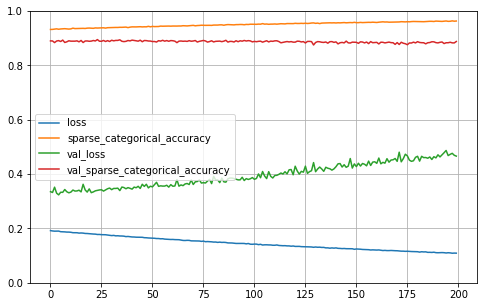

In [34]:
import pandas as pd
X3=pd.DataFrame(history3.history)
X3=X3[:200]
X3.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()